## Masukan Dataset

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("NTB-new.csv")

## Masukan ke dalam DataFrame

In [2]:
repeat = pd.DataFrame(data)

In [3]:
repeat.head()

,day_of_week,hour,loan_sequence,isntb,crm_claddr_area,crm_claddr_city,lending_lapp_application_form_json_religion,lending_lapp_requested_principal,lending_lapp_requested_period_count,client_gender,...,monthlygrosssalary,residencestatus,maritalstatus,numberofdependents,lengthofliving,employmentstatus,lineofbusiness,ref_relationship,app_client_age,label
0,2,15,1,1,3,3,5,2000000,30,1,...,16886186,1,2,2,48,2,3,4,4,1
1,3,10,1,1,2,5,5,1000000,30,2,...,3680000,3,3,1,48,3,18,8,3,1
2,4,15,1,1,2,6,5,3000000,10,1,...,4000000,3,3,1,48,3,15,1,2,1
3,5,12,1,1,2,5,5,2000000,30,2,...,5000000,3,1,0,48,2,22,8,3,1
4,6,10,1,1,2,8,2,2000000,30,1,...,8000000,3,1,0,48,2,9,8,2,1


## Bagi Feature dan Class ke dalam X dan Y

In [4]:
X = np.array(repeat.ix[:, repeat.columns != 'label'])
y = np.array(repeat.ix[:, repeat.columns == 'label'])

C:\Users\diana.wijaya\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\diana.wijaya\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## Hitung Jumlah Kelas

('Good Applicant', 11127)
('Bad Applicant', 2639)


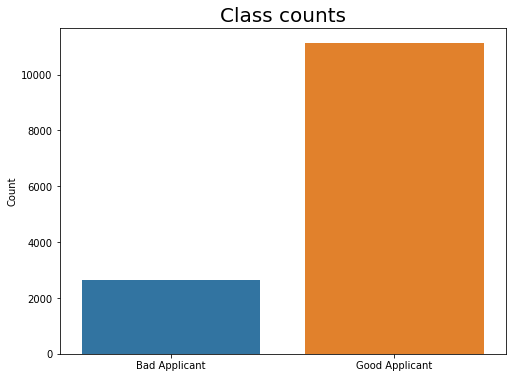

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get number of positve and negative examples
good = repeat[repeat["label"] == 1].shape[0]
bad = repeat[repeat["label"] == 0].shape[0]
print("Good Applicant",good)
print("Bad Applicant",bad)
plt.figure(figsize=(8, 6))
sns.countplot(repeat["label"])
plt.xticks((0, 1), ["Bad Applicant", "Good Applicant"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

dapat dilihat data good dan bad sangat tidak seimbang jumlahnya

## Tes Model sebelum data di undersample

In [6]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [7]:
print("Total data Train Good Applicant: {}".format(sum(y_train==1)))
print("Total data Train Bad Applicant: {} \n".format(sum(y_train==0)))

Total data Train Good Applicant: [7759]
Total data Train Bad Applicant: [1877] 



In [8]:
print("Total data Test Good Applicant: {}".format(sum(y_test==1)))
print("Total data Test Bad Applicant: {} \n".format(sum(y_test==0)))

Total data Test Good Applicant: [3368]
Total data Test Bad Applicant: [762] 



In [9]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clfbefore=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfbefore.fit(X_train,y_train)

# prediction on test set
y_pred=clfbefore.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))

C:\Users\diana.wijaya\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('Accuracy:', 0.8179176755447942)
[[  35  727]
 [  25 3343]]
('Sensitivity', 0.9925771971496437)
('Specificity', 0.045931758530183726)
('Precision', 0.8213759213759214)


## Dapat dilihat dari nilai specificity sebesar 4% yang membuktikan model overfit ke kelas good, karena good kebanyakan dia jadi ikut ikutan good semua. meskipun akurasinya bagus tp itu overfit.

### Terbukti dari ploting bahwa data sangat tidak seimbang

## Coba melakukan teknik sampling dengan library SMOTE untuk menyeimbangkan dataset

In [10]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [11]:
print('Total data dari Train_X: {}'.format(X.shape))
print('Total data dari train_y: {} \n'.format(y.shape))

Total data dari Train_X: (13766L, 22L)
Total data dari train_y: (13766L, 1L) 



In [12]:
print("Total data Test Good Applicant: {}".format(sum(y_test==1)))
print("Total data Test Bad Applicant: {} \n".format(sum(y_test==0)))

Total data Test Good Applicant: [3368]
Total data Test Bad Applicant: [762] 



## Terapkan ke dalam library SMOTE

In [13]:
rus = RandomUnderSampler(random_state=0, replacement=True)
X_resampled, y_resampled = rus.fit_resample(X, y.ravel())

## Masukan ke dalam DataFrame yang baru (data sudah di process)

In [14]:
x_table_under = pd.DataFrame(X_resampled)

In [15]:
y_table_under = pd.DataFrame(y_resampled)

In [16]:
clean_loanbook = pd.concat([x_table_under, y_table_under], axis=1)

In [17]:
clean_loanbook.to_csv (r'C:\Users\diana.wijaya\Desktop\NTB-new-undersample.csv', index = None, header=True, sep=',') #Don't forget to add '.csv' at the end of the path

In [18]:
data = pd.read_csv("NTB-new-undersample.csv", sep=',')

In [19]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,0.1
0,3,10,1,1,2,5,5,2000000,30,2,...,3000000,4,3,1,36,2,18,5,2,0
1,3,21,1,1,2,16,5,2000000,30,1,...,7700000,1,3,2,48,2,15,1,2,0
2,4,17,1,1,2,5,5,2000000,30,1,...,7500000,1,3,0,48,2,7,4,1,0
3,6,14,1,1,2,1,5,2000000,30,2,...,5000000,1,3,1,48,2,22,5,2,0
4,1,13,1,1,2,6,5,2000000,30,2,...,15000000,1,3,2,48,3,22,1,4,0


In [20]:
data.columns = [
    'dayOfWeek',
    'hour',
    'loan_sequence',
    'isntb',
    'area',
    'city',
    'religion',
    'principal',
    'period_count',
    'gender',
    'education',
    'lengthofemployement',
    'referencegender',
    'monthlygrosssalary',
    'residence_status',
    'maritalstatus',
    'numberofdependents',
    'lengthofliving',
    'employementstatus',
    'lineofbusiness',
    'ref_relationship',
    'age',
    'label'
]

In [21]:
X = np.array(data.ix[:, data.columns != 'label'])
y = np.array(data.ix[:, data.columns == 'label'])

C:\Users\diana.wijaya\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\diana.wijaya\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## Hitung Jumlah Kelas Setelah di undersampling

('Good Applicant', 2639)
('Bad Applicant', 2639)


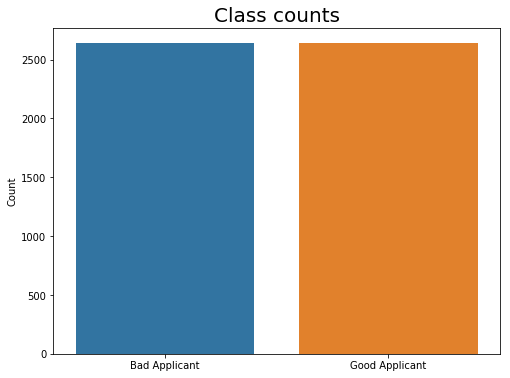

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get number of positve and negative examples
good = data[data["label"] == 1].shape[0]
bad = data[data["label"] == 0].shape[0]
print("Good Applicant",good)
print("Bad Applicant",bad)
plt.figure(figsize=(8, 6))
sns.countplot(data["label"])
plt.xticks((0, 1), ["Bad Applicant", "Good Applicant"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [23]:
clean_loanbook.shape

(5278, 23)

## Coba test data ke dalam model setelah data di undersample

## Bagi ke dalam Train dan Test sebesar 70& train dan 30% test

In [24]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [25]:
print("Total data Train Good Applicant: {}".format(sum(y_train==1)))
print("Total data Train Bad Applicant: {} \n".format(sum(y_train==0)))

Total data Train Good Applicant: [1850]
Total data Train Bad Applicant: [1844] 



In [26]:
print("Total data Test Good Applicant: {}".format(sum(y_test==1)))
print("Total data Test Bad Applicant: {} \n".format(sum(y_test==0)))

Total data Test Good Applicant: [789]
Total data Test Bad Applicant: [795] 



In [27]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))

C:\Users\diana.wijaya\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('Accuracy:', 0.6319444444444444)
[[527 268]
 [315 474]]
('Sensitivity', 0.6007604562737643)
('Specificity', 0.6628930817610063)
('Precision', 0.6388140161725068)


### Akurasi menjadi 61%, tapi itu lebih baik daripada akurasi 81% dengan spec dan sen yang tidak karusan. model ini baik dikarenakan data tidak overfit dilihat dari sensitivity dan specifiticty yang hampir seimbang.

In [28]:
Real_Fitur_X_test = pd.DataFrame(X_test)

In [29]:
Real_Fitur_X_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,9,1,1,2,31,5,2000000,30,1,...,2,3900000,3,3,1,36,2,12,4,1
1,7,23,1,1,2,16,5,2000000,30,2,...,1,5000000,3,3,1,48,3,7,5,2
2,6,22,1,1,2,14,5,1300000,30,1,...,2,3500000,3,3,3,48,2,22,5,1
3,1,10,1,1,2,16,5,2000000,30,1,...,2,6500000,1,3,1,48,2,15,8,2
4,4,12,1,1,2,14,5,2000000,30,2,...,1,6000000,1,2,2,48,2,9,4,3
5,3,23,1,1,2,31,1,2000000,30,2,...,1,20000000,2,3,0,48,2,12,5,2
6,7,12,1,1,2,15,3,1500000,22,2,...,1,5300000,2,3,2,48,2,10,5,2
7,6,15,1,1,1,7,5,1000000,30,1,...,1,3000000,3,2,4,48,2,7,8,2
8,6,12,1,1,2,5,5,2000000,30,2,...,2,7000000,3,1,0,48,2,22,8,1
9,6,1,1,1,2,5,5,1000000,30,1,...,1,5000000,3,1,0,48,3,18,4,2


In [30]:
y_predict = pd.DataFrame(y_pred)

In [31]:
y_test_frame = pd.DataFrame(y_test)

In [32]:
loanbook_prediction = pd.concat([Real_Fitur_X_test, y_predict], axis=1)

In [33]:
loanbook_prediction2 = pd.concat([loanbook_prediction, y_test_frame], axis=1)

In [34]:
loanbook_prediction2.to_csv (r'C:\Users\diana.wijaya\Desktop\NTB-new-loanbook_prediction.csv', index = None, header=True, sep=';') #Don't forget to add '.csv' at the end of the path

In [35]:
prediction = pd.read_csv("NTB-new-loanbook_prediction.csv", sep=";")

In [36]:
prediction = pd.DataFrame(prediction)

In [37]:
prediction.columns = [
    'dayOfWeek',
    'hour',
    'loan_sequence',
    'isntb',
    'area',
    'city',
    'religion',
    'principal',
    'period_count',
    'gender',
    'education',
    'lengthofemployement',
    'referencegender',
    'monthlygrosssalary',
    'residence_status',
    'maritalstatus',
    'numberofdependents',
    'lengthofliving',
    'employementstatus',
    'lineofbusiness',
    'ref_relationship',
    'age',
    'predict',
    'label'
]

In [38]:
prediction.head(20)

,dayOfWeek,hour,loan_sequence,isntb,area,city,religion,principal,period_count,gender,...,residence_status,maritalstatus,numberofdependents,lengthofliving,employementstatus,lineofbusiness,ref_relationship,age,predict,label
0,6,13,1,1,2,14,5,2000000,30,1,...,3,1,0,48,2,8,8,1,1,1
1,5,1,1,1,2,20,5,2000000,30,1,...,3,3,1,48,2,7,1,2,1,1
2,1,21,1,1,2,6,5,2000000,20,1,...,3,3,0,48,2,9,5,2,1,1
3,1,21,1,1,2,16,5,2500000,18,2,...,3,3,2,48,2,7,4,2,1,1
4,5,0,1,1,2,8,5,2000000,30,1,...,3,3,1,48,2,7,4,2,1,0
5,2,8,1,1,2,16,5,2000000,30,2,...,3,3,0,48,2,7,4,2,0,0
6,6,8,1,1,2,20,5,2500000,30,1,...,3,1,0,48,2,15,4,1,1,1
7,3,6,1,1,2,5,5,2000000,23,2,...,3,3,2,48,2,22,8,2,0,0
8,2,21,1,1,6,17,5,2000000,30,2,...,1,3,2,48,2,22,5,4,1,0
9,7,13,1,1,2,31,3,3000000,26,2,...,3,1,0,48,2,12,4,1,0,0


Index([u'dayOfWeek', u'hour', u'loan_sequence', u'isntb', u'area', u'city',
       u'religion', u'principal', u'period_count', u'gender', u'education',
       u'lengthofemployement', u'referencegender', u'monthlygrosssalary',
       u'residence_status', u'maritalstatus', u'numberofdependents',
       u'lengthofliving', u'employementstatus', u'lineofbusiness',
       u'ref_relationship', u'age'],
      dtype='object')


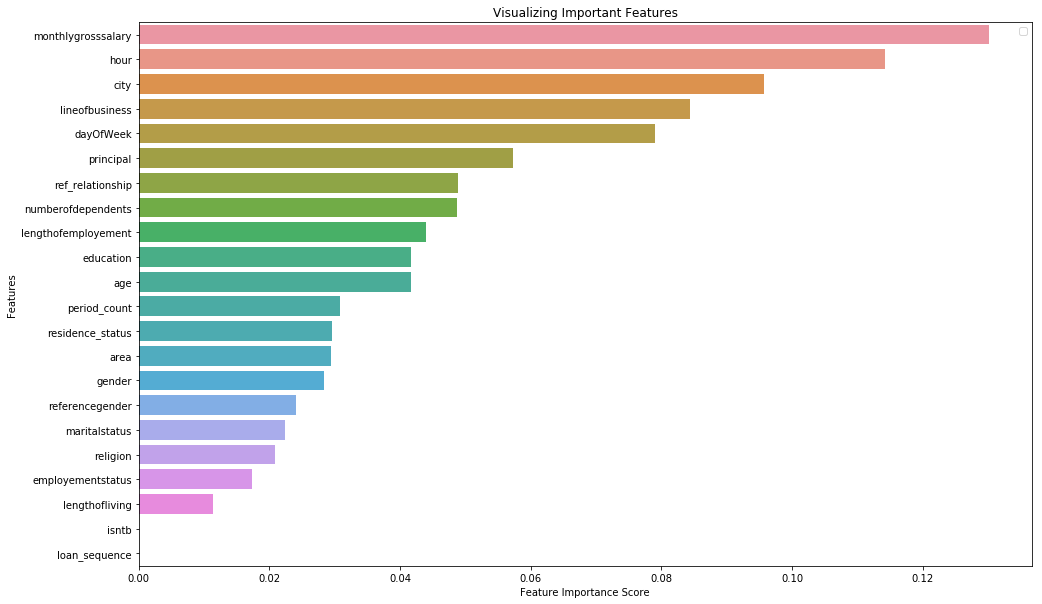

In [39]:
colname = data.columns[0:22]
print colname
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=colname).sort_values(ascending=False)
feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# the size of A4 paper
plt.figure(figsize=(16, 10))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Index([u'dayOfWeek', u'hour', u'loan_sequence', u'isntb', u'area', u'city',
       u'religion', u'principal', u'period_count', u'gender', u'education',
       u'lengthofemployement', u'referencegender', u'monthlygrosssalary',
       u'residence_status', u'maritalstatus', u'numberofdependents',
       u'lengthofliving', u'employementstatus', u'lineofbusiness',
       u'ref_relationship', u'age'],
      dtype='object')


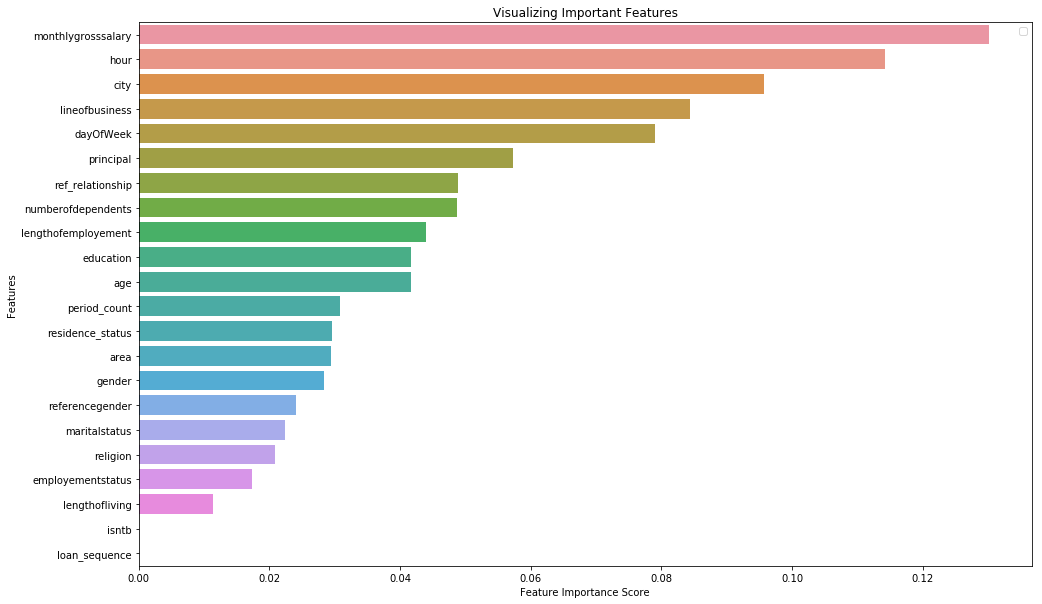

In [40]:
colname = data.columns[0:22]
print colname
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=colname).sort_values(ascending=False)
feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# the size of A4 paper
plt.figure(figsize=(16, 10))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()